In [ ]:
format ELF64

public _start

extrn initscr
extrn start_color
extrn init_pair
extrn getmaxx
extrn getmaxy
extrn raw
extrn noecho
extrn keypad
extrn stdscr
extrn move
extrn getch
extrn addch
extrn refresh
extrn endwin
extrn exit
extrn timeout
extrn usleep
extrn printw

section '.bss' writable
    xmax dq 1
    ymax dq 1
    palette dq 1
    delay dq ?

section '.text' executable
_start:
    call initscr
    mov rdi, [stdscr]
    call getmaxx
    dec rax
    mov [xmax], rax
    call getmaxy
    dec rax
    mov [ymax], rax
    call start_color
    
    ; COLOR_MAGENTA на ЧЕРНОМ фоне
    mov rdi, 1
    mov rsi, 5      ; COLOR_MAGENTA
    mov rdx, 0      ; ЧЕРНЫЙ фон 
    call init_pair
    
    ; WHITE на ЧЕРНОМ фоне  
    mov rdi, 2
    mov rsi, 0      ; WHITE
    mov rdx, 0      ; ЧЕРНЫЙ фон
    call init_pair
    
    call refresh
    call noecho
    call raw
    
    ; Начинаем с COLOR_MAGENTA (пара 1)
    mov rax, ' '
    or rax, 0x100   ; color pair 1 (COLOR_MAGENTA)
    mov [palette], rax

.begin:
    mov rax, [pass_count]
    and rax, 1
    jz .use_magenta
.use_white:
    mov rax, ' '
    or rax, 0x200
    mov [palette], rax
    jmp .after_color_switch
.use_magenta:
    mov rax, ' '
    or rax, 0x100
    mov [palette], rax
.after_color_switch:
    
    ; НАЧАЛО С ЛЕВОЙ СТОРОНЫ (x = 0)
    mov r8, 0
    mov r9, 0
    jmp .loop_to_right  ; Сначала движение направо

.to_down_left:
    inc r8
    inc r9
    cmp r9, [ymax]
    jg .begin

; ДВИЖЕНИЕ НАПРАВО (слева направо)
.loop_to_right:
    mov rdi, [delay]
    call usleep
    mov rdi, r9
    mov rsi, r8
    push r8
    push r9
    call move
    mov rdi, [palette]
    call addch
    call refresh
    mov rdi, 1
    call timeout
    call getch
    cmp rax, 'y'    ; ВЫХОД на 'y'
    jne @f
    jmp .exit
@@:
    cmp rax, 'k'    ; ИЗМЕНЕНИЕ СКОРОСТИ на 'k'
    jne @f
    cmp [delay], 2000
    je .fast1
    mov [delay], 2000
    jmp @f
.fast1:
    mov [delay], 1
@@:
    pop r9
    pop r8
    inc r8
    cmp r8, [xmax]
    jg .to_down_right  ; Достигли правого края - идем вниз
    jmp .loop_to_right

.to_down_right:
    dec r8
    inc r9
    cmp r9, [ymax]
    jg .begin

; ДВИЖЕНИЕ НАЛЕВО (справа налево)
.loop_to_left:
    mov rdi, [delay]
    call usleep
    mov rdi, r9
    mov rsi, r8
    push r8
    push r9
    call move
    mov rdi, [palette]
    call addch
    call refresh
    mov rdi, 1
    call timeout
    call getch
    cmp rax, 'y'    ; ВЫХОД на 'y'
    jne @f
    jmp .exit
@@:
    cmp rax, 'k'    ; ИЗМЕНЕНИЕ СКОРОСТИ на 'k'
    jne @f
    cmp [delay], 2000
    je .fast2
    mov [delay], 2000
    jmp @f
.fast2:
    mov [delay], 1
@@:
    pop r9
    pop r8
    dec r8
    cmp r8, 0
    jl .to_down_left  ; Достигли левого края - идем вниз
    jmp .loop_to_left

.exit:
    call endwin
    call exit

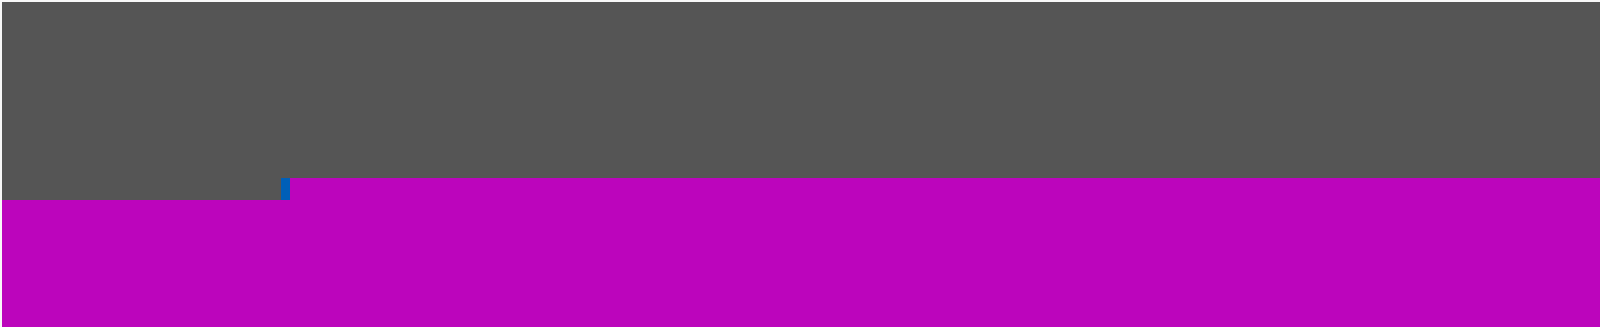

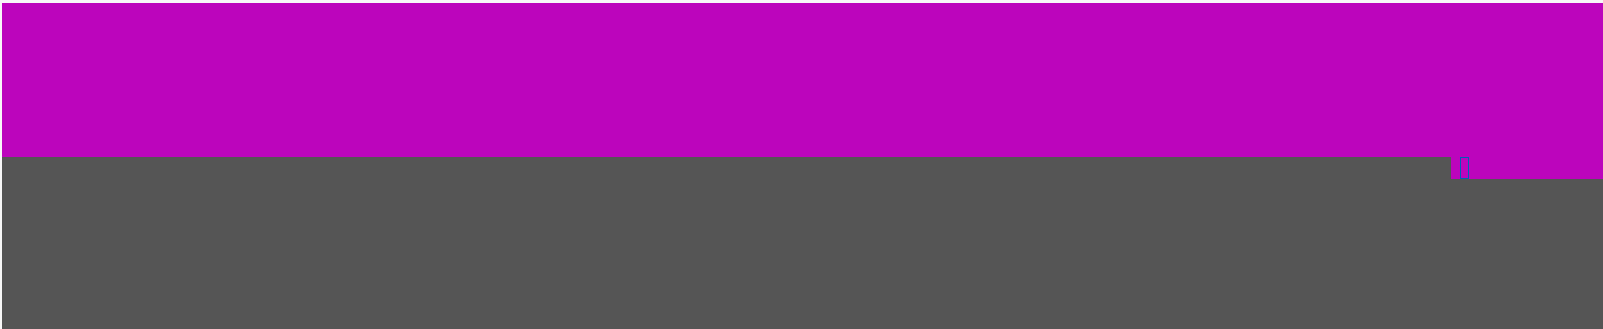